# <center>  Getting Started With Python </center>

## Introduction ##

Hopefully you have read the installing anacoda guides and have set up either Spyder or notebooks to run python.

If you have used MATLAB before you may find [this presentation](https://github.com/ResearchComputing/Final_Tutorials/blob/master/Python_Matlab_Users/python_matlab_users.pdf) useful.

Here you will learn the very basics of python before we point you in the direction of more indepth tutorials. 

* Modules
* Some basic syntax
* Reading and writing CSV files
* Reading and writing NetCDF files
* Basic ploting 

## Modules ##

You do not need to reinvent the wheel. The are hundreds of "modules" availble that have prewritten functions but to keep your code simple python requires you to just "import" in the modules required. You should do this at the start of your code.

In [1]:
# Use the hash key to write comments (alt + 3 on a mac)
import numpy as np # is the fundamental package for scientific computing with Python.

Numpy contains all the basic tools for scientific computing like mean, sum and we can use these now by typing np.func() where func is your function suchas sum or mean. Ipython allows you to use the tab button to see what options are available. Try it in the cell below

In [ ]:
np.

First we will create an array an


In [2]:
a = np.linspace(1,20,20) # Create an array 1 -20 with 20 values equally spaced

You won't see any output, if you want to see it just type the variable name

In [3]:
a

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [4]:
# access items from a list
print('first', a[0])
print('last', a[-1])
print('first 3', a[:3])
print('last 3', a[-3:])
print('skipping every other item', a[0:20:2])

('first', 1.0)
('last', 20.0)
('first 3', array([ 1.,  2.,  3.]))
('last 3', array([ 18.,  19.,  20.]))
('skipping every other item', array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.]))


In terms of set notation, python indexing is left inclusive, right exclusive. If you remember this, you will never go wrong.

In [5]:
# that means we get an error from the following
N = len(a) # length of array a
a[N]


IndexError: index 20 is out of bounds for axis 0 with size 20

In [6]:
# this index notation also applies to strings
name = 'New Student'
print(name[4::])

Student


## Reading and writing CSV ##

Now we're going to play around with a small amout of data. CSV that you have just loaded stands for comma seporated values. You might get excel files exported like this if you are working with small data sets. 

In [7]:
# First import csv module
import csv

Writing

In [8]:
# first we'll make a csv file to read
# The newfile is created with the variable filename
filename = open('newfile','w')
# Now we tell the csv module we want to write to filename
writer = csv.writer(filename)
# writer its now ready to write, lets write a file of 'a' that we created before
writer.writerow(a)
# Now you must close the file
filename.close() 

Reading

In [16]:
# nowlets read in newfile and printout its contents
filename = open('newfile','r') # Note 'r' here instead of 'w'
reader = csv.reader(filename)

A quick introduction to for loops. 

In [17]:
# Read in each row of a file
for row in reader: # You need a colon to start your for loop
    print row # indent four spaces to interate over for loop

# return to normal indentation to exit for loop
# Now python doesn't know what kind of data it read in
# Lets make an array and fill it
# you must set your array size b 
# fill it with zeros, and it's going to want to be the same shape as row
# BUT you want a floating point data type (numbers with decimal point)
b = np.zeros_like(row,dtype=np.float)
# For an index i in the range of the length of row :
for i in range(len(row)):
    # Fill each index i of b with a floating point value from row
    b[i] = float(row[i]) 

# Now you must close the file
filename.close() 

['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0']


Above you see the printed strings of row 
Now let's just test that we've read in a and our new variable b:

In [19]:
b

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

More indepth csv reading/writing can be found [here](https://pymotw.com/2/csv/) 

## Reading and writing netcdf ##

If you are working with any model output it is likely you will  work with netcdf files. These are self describing files and an excellent way for storing data. You'll learn more as we write out a netcdf file.

**By default anaconda does not include netcdf module you will have to install it**

```bash
conda install netCDF4
```

now we must import it

In [16]:
import netCDF4
import math # We need this for some mathematical constants suchas pi.

Now lets say you would like generate a windress pattern like you see in the southern ocean with your max $\tau_o$ set to $0.2Nm^-2$

$\tau_s(y)=\tau_0 sin(\frac{\pi y}{Ly})$

If you know latex code you can render this directly in markdown cells and figure lables

In [55]:
# Difine domain area
x = np.linspace(0,200,201) # x dir is 0 - 100 
y = np.linspace(0,100,101) # y dir is 0 - 100
[X, Y] = np.meshgrid(x, y) # Make an array of the grid Y 
tau=0.2*(np.sin((Y)*(math.pi/y[-1]))) # The equation above

So lets plot what we've made, first we have to import the plotting module and give it an abbreviated name plt

In [47]:
import matplotlib.pyplot as plt
# % is some special note book fuctions here this allows your to view plots inline with code
%matplotlib inline

[Click for a list of "magics"](https://ipython.org/ipython-doc/3/interactive/magics.html)

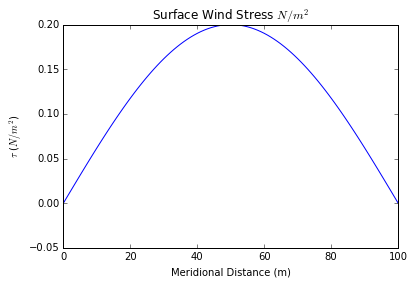

In [57]:
plt.plot(y,tau[:,50]) # A simple plot of tau agaist y
plt.title('Surface Wind Stress $N/m^2$')
plt.ylabel(r'$\tau$ ($N/m^2$)') 
plt.xlabel('Meridional Distance (m)')

Now to create the netcdf file.

In [67]:
f=netCDF4.Dataset('Wind.nc','w')
f.createDimension('X',len(x))
f.createDimension('Y',len(y))
tau_nc=f.createVariable('tau','double',('X','Y'))
tau_nc[:]=tau
f.close()

Note one you have started writing to file f you must close it ```f.close``` before doing any more or you will get a permissions error!

Download [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html) for easy viewing of this file. 

In [73]:
# Clear the vaiables
%reset_selective tau 

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


now tau has been removed it will appear undefined

In [74]:
tau

NameError: name 'tau' is not defined

In [76]:
f=netCDF4.Dataset('Wind.nc','r') # read in this file
tau = f.variables['tau'] # read in this variable

In [77]:
# You can now see the attributes
tau

<type 'netCDF4._netCDF4.Variable'>
float64 tau(X, Y)
unlimited dimensions: 
current shape = (201, 101)
filling on, default _FillValue of 9.96920996839e+36 used

In [78]:
# The array is accessed:
tau[:]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   6.28215182e-03],
       [  6.28215182e-03,   6.28215182e-03,   6.28215182e-03, ...,
          6.28215182e-03,   6.28215182e-03,   6.28215182e-03],
       ..., 
       [  6.28215182e-03,   6.28215182e-03,   6.28215182e-03, ...,
          6.28215182e-03,   6.28215182e-03,   6.28215182e-03],
       [  6.28215182e-03,  -6.43249060e-17,  -6.43249060e-17, ...,
         -6.43249060e-17,  -6.43249060e-17,  -6.43249060e-17],
       [ -6.43249060e-17,  -6.43249060e-17,  -6.43249060e-17, ...,
         -6.43249060e-17,  -6.43249060e-17,  -6.43249060e-17]])

# Next steps

Ryan Abernathy has kindly put up his introduction to python notebooks which can be found in the following links:

1. [Basic Python](http://nbviewer.jupyter.org/github/rabernat/python_teaching/blob/master/one_day_workshop/01_core_python.ipynb)
2. [Numpy and Matplotlib](http://nbviewer.jupyter.org/github/rabernat/python_teaching/blob/master/one_day_workshop/02_numpy_and_matplotlib.ipynb)
3. [Pandas with Earthquake Data](http://nbviewer.jupyter.org/github/rabernat/python_teaching/blob/master/one_day_workshop/03_pandas_earthquake.ipynb)
4. [xray and Pacific SSTs](http://nbviewer.jupyter.org/github/rabernat/python_teaching/blob/master/one_day_workshop/04_xray_sst.ipynb)

Any datasets required are found [here](https://github.com/rabernat/python_teaching)